# Librerías y lectura

Importación de librerías

In [1260]:
import pandas as pd
import numpy as np

In [1261]:
#pip freeze > requirements.txt

Lectura del CSV y primer vistazo

In [1262]:
df_original = pd.read_csv('Anuncios_alquiler_dataset_final.csv', sep=';')

# Eliminamos los espacios en blanco al principio y al final de cada celda
df_original = df_original.applymap(lambda x: x.strip() if isinstance(x, str) else x)


print('El tamaño del dataframe es:', df_original.shape)
df_original.head(5)

El tamaño del dataframe es: (1545, 24)


,Referencia,Tipo_vivienda,Dirección,Barrio,Distrito,Población,Superficie construida,Superficie útil,Superficie solar,Habitaciones,...,Gastos de comunidad,Precio,Precio/m²,PMZona,PMm²Zona,RMP,RMH,Descripción,Url_foto,Url_vivienda
0,2805-002380,Piso,Calle Francisco de Goya,Prado de Somosaguas,Pozuelo de Alarcón,Pozuelo de Alarcón,121.0,121.0,0.0,3,...,Incluidos,2100.0,17.36,4039.88,19.27,27167.0,86403.0,"Ubicada en la primera planta, esta residencia ...",https://fotos.imghs.net/apps/2805/40873729625....,https://www.pisos.com/alquilar/piso-prado_de_s...
1,2805-002377,Piso,Calle Solano,Prado de Somosaguas,Pozuelo de Alarcón,Pozuelo de Alarcón,225.0,190.0,0.0,4,...,NaN,2500.0,11.11,4039.88,19.27,27167.0,86403.0,INMOBARALIA presenta una exclusiva oportunidad...,https://fotos.imghs.net/apps/2805/40056907134....,https://www.pisos.com/alquilar/piso-prado_de_s...
2,2805-002317,Casa,Calle XIX,Las Matas-Los Peñascales,Las Rozas de Madrid,Las Rozas de Madrid,600.0,600.0,0.0,6,...,NaN,4000.0,6.67,2561.81,12.41,21254.0,65428.0,Inmobaralia te ofrece la oportunidad de alquil...,https://fotos.imghs.net/apps/2805/29189878080....,https://www.pisos.com/alquilar/casa-las_matas_...
3,2805-002378,Piso,Calle de Sinesio Delgado,Almenara,Tetuán,Madrid Capital,89.0,89.0,0.0,2,...,Incluidos,1600.0,17.98,1950.70,21.77,17026.0,39991.0,Descubre tu nuevo hogar en este piso recién re...,https://fotos.imghs.net/apps/2805/40857548919....,https://www.pisos.com/alquilar/piso-tetuan_alm...
4,IF5695-240207-16,Ático,Calle de la Magdalena,Embajadores-Lavapiés,Centro,Madrid Capital,90.0,NaN,0.0,3,...,NaN,2000.0,22.22,2787.63,26.98,19199.0,38360.0,"¡Casas y mas, alquila piso exterior de 3 dormi...",https://fotos.imghs.net/apps/1018/072/1018_102...,https://www.pisos.com/alquilar/atico-centro_em...


In [1263]:
dfdistrito = df_original.groupby('Distrito').first()[['RMH', 'PMm²Zona', 'PMZona']]
dfdistrito.to_csv('Distrito_medidas_Alquiler.csv', sep=';')

In [1264]:
pd.DataFrame(df_original['Tipo_vivienda'].unique(), columns=['TipoVivienda']).to_csv('Tipo_vivienda_Alquiler.csv', sep=';')

In [1265]:
df_original.dtypes

Referencia                object
Tipo_vivienda             object
Dirección                 object
Barrio                    object
Distrito                  object
Población                 object
Superficie construida    float64
Superficie útil          float64
Superficie solar         float64
Habitaciones               int64
Baños                      int64
Planta                    object
Antigüedad                object
Conservación              object
Gastos de comunidad       object
Precio                   float64
Precio/m²                float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
Descripción               object
Url_foto                  object
Url_vivienda              object
dtype: object

In [1266]:
df_original.columns #Para seleccionar las columnas que se van a utilizar

Index(['Referencia', 'Tipo_vivienda', 'Dirección', 'Barrio', 'Distrito',
       'Población', 'Superficie construida', 'Superficie útil',
       'Superficie solar', 'Habitaciones', 'Baños', 'Planta', 'Antigüedad',
       'Conservación', 'Gastos de comunidad', 'Precio', 'Precio/m²', 'PMZona',
       'PMm²Zona', 'RMP', 'RMH', 'Descripción', 'Url_foto', 'Url_vivienda'],
      dtype='object')

In [1267]:
columnas_a_usar = [
    'Tipo_vivienda', 'Superficie construida', 'Superficie útil',
       'Superficie solar', 'Habitaciones', 'Baños', 'Planta', 'Antigüedad',
       'Conservación', 'Gastos de comunidad', 'Precio', 'PMZona',
       'PMm²Zona', 'RMP', 'RMH'
]

df = df_original[columnas_a_usar]
df.dtypes

Tipo_vivienda             object
Superficie construida    float64
Superficie útil          float64
Superficie solar         float64
Habitaciones               int64
Baños                      int64
Planta                    object
Antigüedad                object
Conservación              object
Gastos de comunidad       object
Precio                   float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
dtype: object

# Tratamiento de columnas: nulos y dtypes

In [1268]:
#Visualizamos los nulos
df.isna().sum() 

Tipo_vivienda               0
Superficie construida       0
Superficie útil           931
Superficie solar            0
Habitaciones                0
Baños                       0
Planta                    369
Antigüedad               1249
Conservación              544
Gastos de comunidad      1511
Precio                      0
PMZona                      0
PMm²Zona                    0
RMP                         1
RMH                         1
dtype: int64

Columna RMP/RMH

In [1269]:
df[df['RMP'].isna()]

,Tipo_vivienda,Superficie construida,Superficie útil,Superficie solar,Habitaciones,Baños,Planta,Antigüedad,Conservación,Gastos de comunidad,Precio,PMZona,PMm²Zona,RMP,RMH
1530,Estudio,88.0,35.0,0.0,6,3,Bajo,NaN,NaN,NaN,600.0,600.0,6.82,NaN,NaN


In [1270]:
df = df[~df['RMP'].isna()] #Son 2 valores, por lo que no representan un problema y se eliminan

Columna Planta

In [1271]:
import matplotlib.pyplot as plt

df['Planta'].value_counts()

0             191
2             189
3             185
1             177
4             136
5              78
6              68
Bajo           56
7              40
8              19
9              11
10              5
Semisótano      4
15              4
11              3
Principal       3
12              2
Entresuelo      2
16              1
13              1
Name: Planta, dtype: int64

In [1272]:
df['Planta'] = df['Planta'].str.strip()
df['Planta'] = df['Planta'].replace({'Sótano': -1, 'Semisótano': -0.5, 'Bajo': 0, 'Principal': 0.5, 'Entresuelo': 0})
df['Planta'].unique()

antes = df['Planta'].dropna().astype(float)

Imputamos la mediana a los pisos que salen como nulos

In [1273]:
median = (pd.to_numeric(df[~df['Planta'].isna()]['Planta']).median())
df['Planta'].fillna(median, inplace=True)

df['Planta'] = pd.to_numeric(df['Planta'], errors='coerce')

df['Planta'].dtypes

dtype('float64')

In [1274]:
median

2.0

2.0


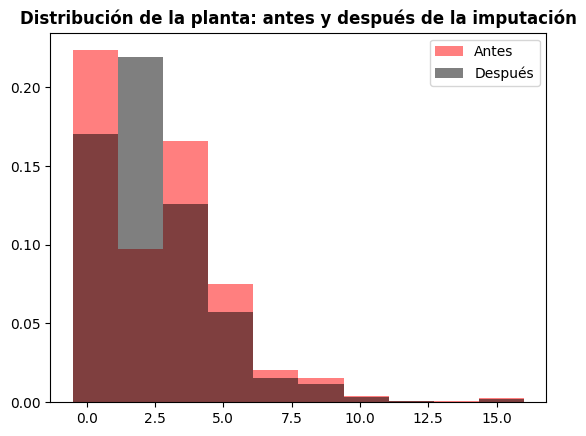

In [1275]:
print(median)
despues=df['Planta']
plt.hist(antes, alpha=0.5, label='Antes', color='red', density=True)
plt.hist(despues, alpha=0.5, label='Después', color='black', density=True)

plt.title('Distribución de la planta: antes y después de la imputación', fontweight='bold')

plt.legend(loc='upper right')
plt.show()

In [1276]:
df.isna().sum()

Tipo_vivienda               0
Superficie construida       0
Superficie útil           931
Superficie solar            0
Habitaciones                0
Baños                       0
Planta                      0
Antigüedad               1248
Conservación              543
Gastos de comunidad      1510
Precio                      0
PMZona                      0
PMm²Zona                    0
RMP                         0
RMH                         0
dtype: int64

Eliminamos las columnas de "Antigüedad" y "Gastos de comunidad" porque contienen demasiados nulos (1248 y 1510).

La columna "Superficie útil" también contiene casi el 50% de los nulos, por lo que también la eliminamos.

Procedemos a probar 2 dataframes: uno con los datos de conservación y otro sin ellos.

In [1277]:
columnas_a_usar = [
    'Tipo_vivienda',
    'Superficie construida',
    'Superficie solar',
    'Habitaciones',
    'Baños',
    'Planta',
    'Conservación',
    'Precio',
    'PMZona',
    'PMm²Zona',
    'RMP',
    'RMH'
 ]

In [1278]:
df = df[columnas_a_usar]

#Eliminamos los nulos de conservación.
df = df[~df['Conservación'].isna()]
print(f'Dimensiones del df: {df.shape}')
df.dtypes

Dimensiones del df: (1001, 12)


Tipo_vivienda             object
Superficie construida    float64
Superficie solar         float64
Habitaciones               int64
Baños                      int64
Planta                   float64
Conservación              object
Precio                   float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
dtype: object

Superficie solar outliers

In [1279]:
# Filtramos la columna de superficie solar ya que contiene outliers por encima (8k m2)

print(f'Antes: {df.shape}')

# Calculate the upper percentile
upper_percentile = df['Superficie solar'].quantile(0.8)

# Filter the dataframe to remove outliers
df = df[df['Superficie solar'] <= upper_percentile]
print(f'Después: {df.shape}')

Antes: (1001, 12)
Después: (949, 12)


In [1280]:
# Tras comprobar nuestro modelo, hemos decidido eliminar la columna de superficie solar ya que en los coeficientes nos aporta un valor nulo (0)
df = df.drop(columns=['Superficie solar'])

Outliers de precio

In [1281]:
df['Precio'].describe()

count      949.000000
mean      2592.180190
std       2051.987015
min        580.000000
25%       1200.000000
50%       1900.000000
75%       3278.000000
max      15000.000000
Name: Precio, dtype: float64

In [1282]:
# Filtramos la columna de precio para eliminar los outliers por arroba de 0.95

print(f'Antes: {df.shape}')

# Calculate the lower and upper percentiles
upper_percentile = df['Precio'].quantile(0.95)

# Filter the dataframe to remove outliers
df = df[(df['Precio'] <= upper_percentile)]

print(f'Después: {df.shape}')


df['Precio'].describe()


Antes: (949, 11)
Después: (901, 11)


count     901.000000
mean     2249.643729
std      1371.333532
min       580.000000
25%      1200.000000
50%      1800.000000
75%      3000.000000
max      6800.000000
Name: Precio, dtype: float64

In [1283]:
df.to_csv('Anuncio_Alquiler_ML_Limpio.csv', index=False, sep=';')